In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("Algerian_forest_fires_dataset_2.csv")
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0


In [3]:
# check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 13.5 KB


In [4]:
#description of the dataset, min, mean ,max etc
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,122.0,15.754098,8.843274,1.0,8.000,16.00,23.000,31.0
month,122.0,7.500000,1.115259,6.0,7.000,7.50,8.000,9.0
year,122.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,122.0,31.180328,3.320401,22.0,29.000,31.00,34.000,37.0
RH,122.0,67.975410,11.154411,45.0,60.000,68.00,77.750,89.0
Ws,122.0,16.000000,2.848807,11.0,14.000,16.00,18.000,26.0
Rain,122.0,0.842623,2.409208,0.0,0.000,0.00,0.500,16.8
FFMC,122.0,74.672951,15.558713,28.6,65.925,80.90,86.775,90.3
DMC,122.0,12.314754,11.274360,0.7,3.725,9.45,16.300,54.2
DC,122.0,53.160656,51.778265,6.9,10.050,35.55,79.025,220.4


In [5]:
#to check on null elements
data.info()
#No null elements present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 13.5 KB


<Figure size 360x720 with 0 Axes>

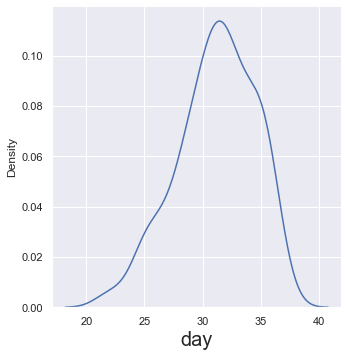

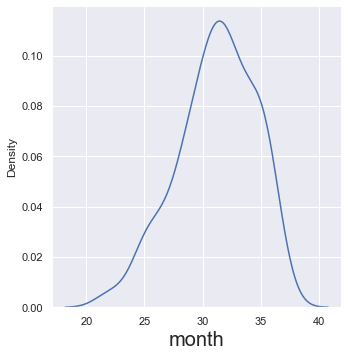

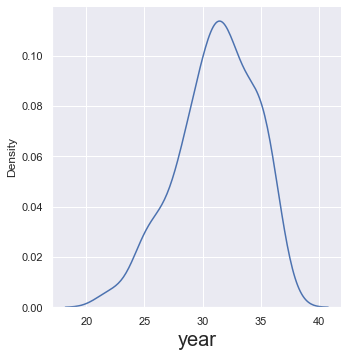

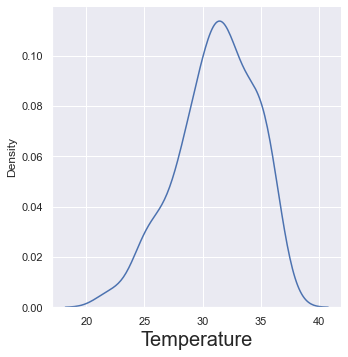

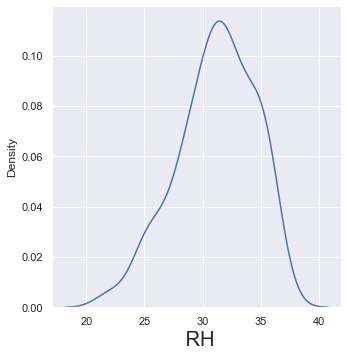

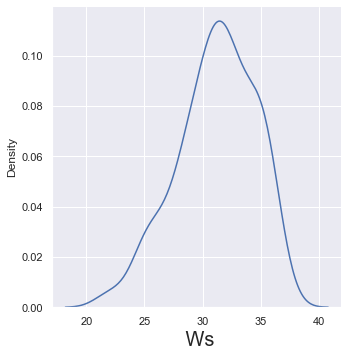

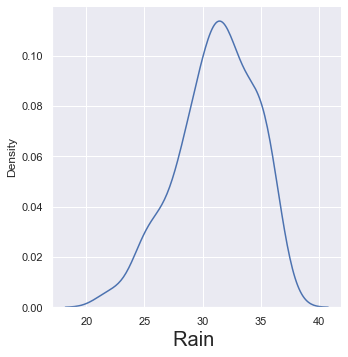

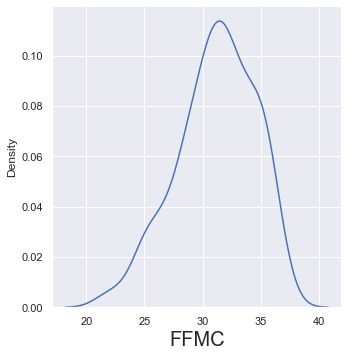

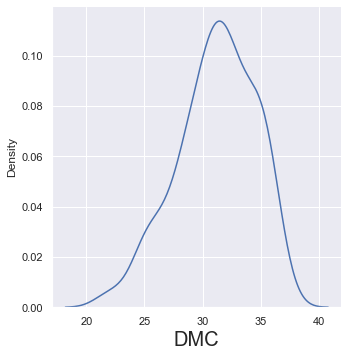

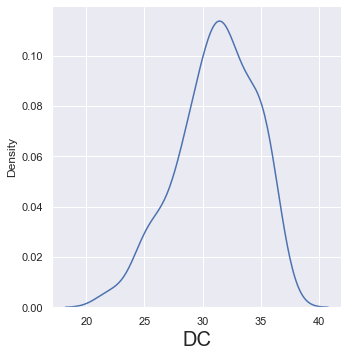

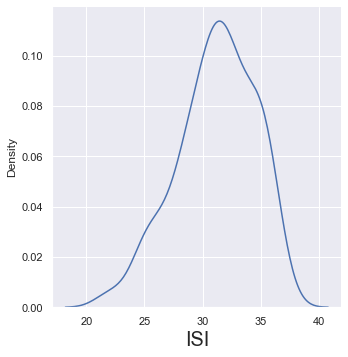

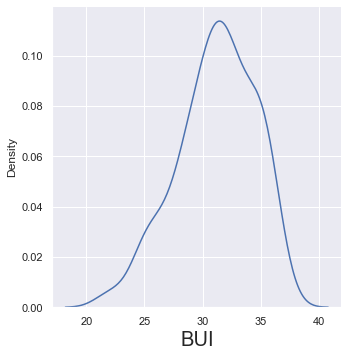

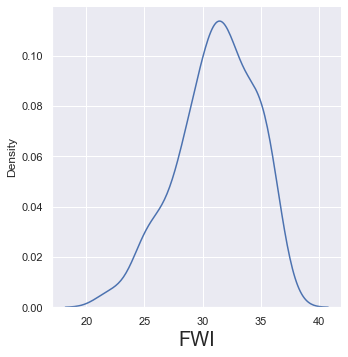

In [6]:
#lets check the ditribution of each column
plt.figure(figsize=(5,10), facecolor='white')
plot=0
for column in data:
    if plot<=12:
        
        sns.displot(data["Temperature"],kind="kde")
        plt.xlabel(column,fontsize=20)
        plot+=1
        

        

The columns-temperature,Rh,WS,rain,FFMC,DMC,DC,ISI,BUI,FWI has a gaussian distribution with a slight left skew, which is OK

<AxesSubplot:>

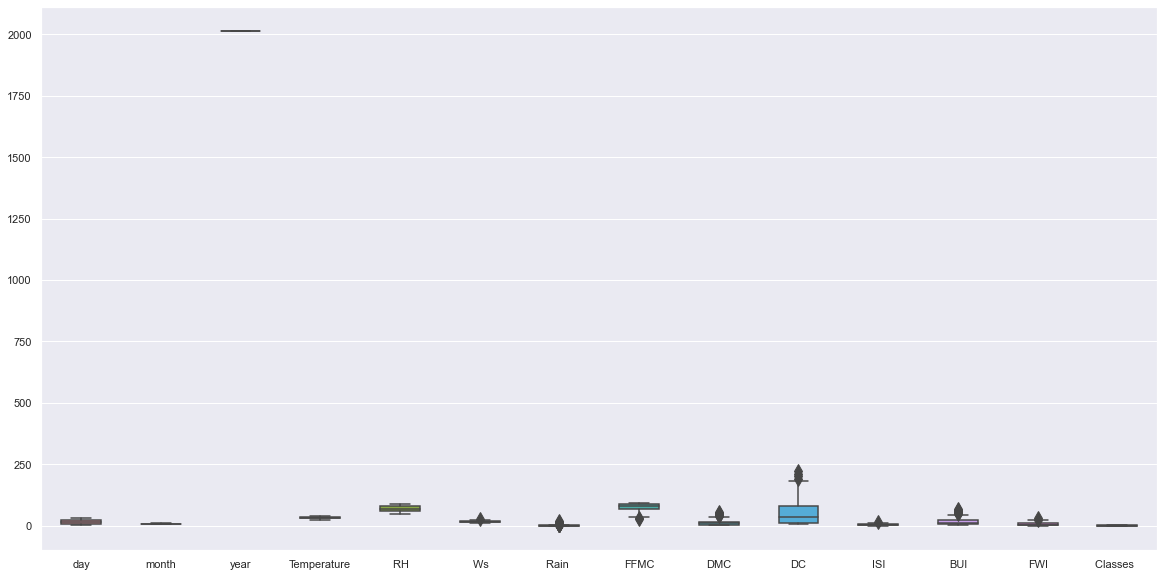

In [7]:
plt.subplots(figsize=(20,10))
sns.boxplot(data=data, width=0.5,fliersize=10)


some outliers is present in some columns but we will keep them as they donot have extreme values

In [8]:
#TO DELETE SPACES in columns name, eg in Classes
data.columns=data.columns.str.strip()

In [9]:
#Lets separate train and test data
x=data.drop(columns=['Classes'])
x

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1


In [10]:
y=data["Classes"]
y

0      0
1      0
2      0
3      0
4      0
      ..
117    0
118    1
119    0
120    0
121    0
Name: Classes, Length: 122, dtype: int64

In [11]:
#Lets scale the model
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar

StandardScaler()

In [12]:
x_scaled=scalar.fit_transform(x)
x_scaled

array([[-1.67527776, -1.35052592,  0.        , ..., -0.78280399,
        -0.83429393, -0.80384162],
       [-1.56173115, -1.35052592,  0.        , ..., -0.88249301,
        -0.7996075 , -0.81967191],
       [-1.44818455, -1.35052592,  0.        , ..., -1.11510074,
        -0.88285493, -0.8671628 ],
       ...,
       [ 1.39048054,  1.35052592,  0.        , ..., -0.61665561,
        -0.59842621, -0.74052044],
       [ 1.50402714,  1.35052592,  0.        , ..., -1.11510074,
        -0.86204307, -0.8671628 ],
       [ 1.61757374,  1.35052592,  0.        , ..., -1.14833042,
        -0.90366679, -0.8671628 ]])

In [13]:
#lets Split train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=10)

In [14]:
x_train.shape

(81, 13)

In [15]:
y_train.shape

(81,)

In [16]:
x_test.shape

(41, 13)

In [17]:
y_test.shape

(41,)

# Model Training

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [19]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [21]:
#lets check the acuuracy of the model
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.926829268292683

Accuracy is fairly good

In [22]:
#confusion matrix
con_mat=confusion_matrix(y_test,y_pred)
con_mat

array([[21,  0],
       [ 3, 17]], dtype=int64)

In [23]:
#True positive
TP=con_mat[0][0]
TP

21

In [24]:
#False positive
FP=con_mat[0][1]
FP

0

In [25]:
#False negative
FN=con_mat[1][0]
FN

3

In [26]:
#FTrue negative
TN=con_mat[1][1]
TN

17

In [27]:
#precision
precision=TP/(TP+FP)
precision

1.0

In [28]:
#recall
recall=TP/(TP+FN)
recall

0.875

In [29]:
# F1 Score
F1_Score = 2*(recall * precision) / (recall + precision)
F1_Score

0.9333333333333333

In [30]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.925

the significance of Roc curve and AUC?
In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use